本指南可以帮助您开始使用 NetworkX。

### 创建网络（图）

创建一个没有节点和边的空网络。

In [3]:
import networkx as nx
G = nx.Graph()

In [4]:
# !pip install networkx

根据定义，“图”是节点（顶点）以及
节点对（称为边、链接等）的集合。 在 NetworkX 中节点可以
可以是任何 [hashable](https://docs.python.org/3/glossary.html#term-hashable) 对象，例如文本字符串、图像、XML 对象、
另一个 Graph、自定义节点对象等。

# 节点

图“G”可以通过多种方式增长。 NetworkX 包含许多图生成函数和多种格式读取和写入图。
首先将看看简单的操作。 可以一次添加一个节点。

In [3]:
G.add_node(1)

or add nodes from any [iterable](https://docs.python.org/3/glossary.html#term-iterable) container, such as a list

In [9]:
G.add_nodes_from([2, 3])
print(G.nodes)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


You can also add nodes along with node
attributes if your container yields 2-tuples of the form
`(node, node_attribute_dict)`:

```
>>> G.add_nodes_from([
...     (4, {"color": "red"}),
...     (5, {"color": "green"}),
... ])
```

Node attributes are discussed further below.

Nodes from one graph can be incorporated into another:

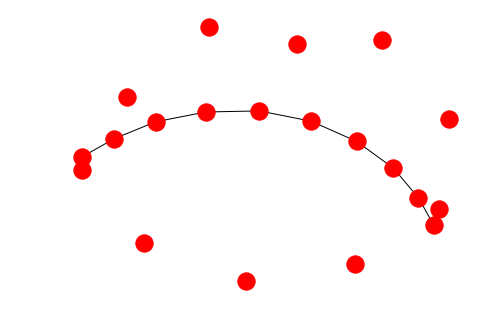

In [14]:
import networkx as nx
H = nx.path_graph(10)
nx.draw(H)
G.add_nodes_from(H)
nx.draw(G)
# import matplotlib.pyplot as plt
# plt.show()

`G` now contains the nodes of `H` as nodes of `G`.
In contrast, you could use the graph `H` as a node in `G`.

In [15]:
G.add_node(H)

The graph `G` now contains `H` as a node.  This flexibility is very powerful as
it allows graphs of graphs, graphs of files, graphs of functions and much more.
It is worth thinking about how to structure your application so that the nodes
are useful entities.  Of course you can always use a unique identifier in `G`
and have a separate dictionary keyed by identifier to the node information if
you prefer.

# Edges

`G` can also be grown by adding one edge at a time,

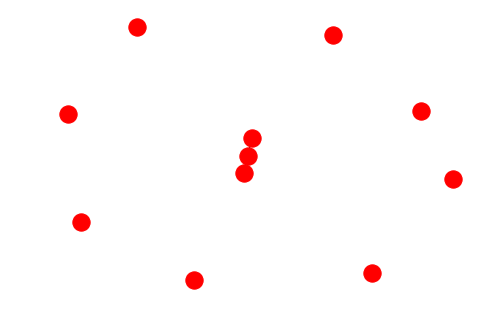

In [16]:
G.add_edge(1, 2)
e = (2, 3)
G.add_edge(*e)  # unpack edge tuple*
nx.draw(G)

by adding a list of edges,

In [17]:
G.add_edges_from([(1, 2), (1, 3)])

or by adding any ebunch of edges.  An *ebunch* is any iterable
container of edge-tuples.  An edge-tuple can be a 2-tuple of nodes or a 3-tuple
with 2 nodes followed by an edge attribute dictionary, e.g.,
`(2, 3, {'weight': 3.1415})`.  Edge attributes are discussed further
below.

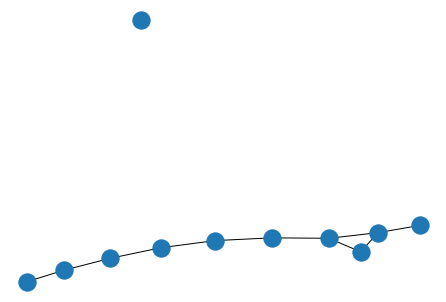

In [17]:
G.add_edges_from(H.edges)
nx.draw(G)

There are no complaints when adding existing nodes or edges. For example,
after removing all nodes and edges,

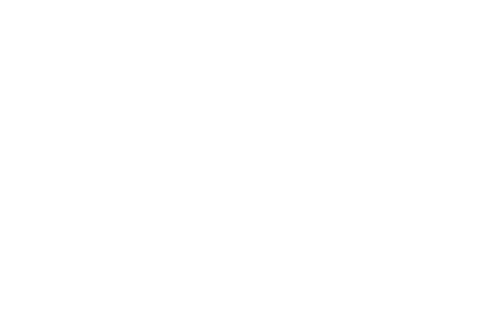

In [19]:
G.clear()
nx.draw(G)

we add new nodes/edges and NetworkX quietly ignores any that are
already present.

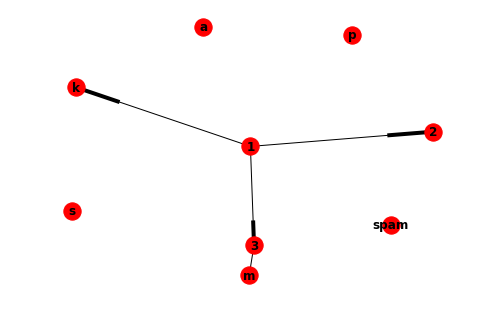

In [38]:
import networkx as nx
G.clear()
nx.draw(G)
G.add_edges_from([(1, 2), (1, 3)])
# nx.draw(G, with_labels=True, font_weight='bold')
G.add_node(1)
G.add_node('k')
G.add_edge(1, 'k')
# nx.draw(G, with_labels=True, font_weight='bold')
G.add_edge(1, 2)
G.add_node("spam")        # adds node "spam"
# nx.draw(G, with_labels=True, font_weight='bold')
G.add_nodes_from("spam")  # adds 4 nodes: 's', 'p', 'a', 'm'
G.add_edge(3, 'm')
nx.draw(G, with_labels=True, font_weight='bold')
# nx.draw(G)

At this stage the graph `G` consists of 8 nodes and 3 edges, as can be seen by:

In [39]:
n=G.number_of_nodes()
print(n)
G.number_of_edges()

9


4

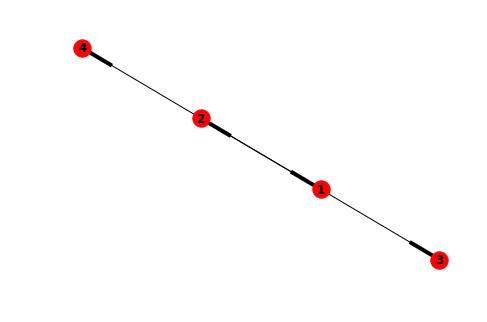

In [40]:
DG = nx.DiGraph()
DG.add_edge(2, 1)   # adds the nodes in order 2, 1
DG.add_edge(1, 3)
DG.add_edge(2, 4)
DG.add_edge(1, 2)
assert list(DG.successors(2)) == [1, 4]
assert list(DG.edges) == [(2, 1), (2, 4), (1, 3), (1, 2)]
nx.draw(DG, with_labels=True, font_weight='bold')

# Examining elements of a graph

We can examine the nodes and edges. Four basic graph properties facilitate
reporting: `G.nodes`, `G.edges`, `G.adj` and `G.degree`.  These
are set-like views of the nodes, edges, neighbors (adjacencies), and degrees
of nodes in a graph. They offer a continually updated read-only view into
the graph structure. They are also dict-like in that you can look up node
and edge data attributes via the views and iterate with data attributes
using methods `.items()`, `.data('span')`.
If you want a specific container type instead of a view, you can specify one.
Here we use lists, though sets, dicts, tuples and other containers may be
better in other contexts.

In [52]:
# G=DG
list(G.nodes)
print(G.nodes)
list(G.edges)
print(G.edges)
list(G.adj[1])  # or list(G.neighbors(1))
print(G.adj[1])
print(G.adj)
G.degree[1]  # the number of edges incident to 1
print(G.degree)

[]
[]


KeyError: 1

One can specify to report the edges and degree from a subset of all nodes
using an nbunch. An *nbunch* is any of: `None` (meaning all nodes),
a node, or an iterable container of nodes that is not itself a node in the
graph.

In [37]:
G.edges([2, 'm'])
G.degree([2, 3])

DiDegreeView({2: 3, 3: 1})

# Removing elements from a graph

One can remove nodes and edges from the graph in a similar fashion to adding.
Use methods
`Graph.remove_node()`,
`Graph.remove_nodes_from()`,
`Graph.remove_edge()`
and
`Graph.remove_edges_from()`, e.g.

In [61]:
# nx.draw(G, with_labels=True, font_weight='bold')
G.add_node(1)
G.remove_node(1)
# nx.draw(G, with_labels=True, font_weight='bold')
# G.remove_nodes_from("spam")
# list(G.nodes)
# G.remove_edge(1, 3)

# Using the graph constructors

Graph objects do not have to be built up incrementally - data specifying
graph structure can be passed directly to the constructors of the various
graph classes.
When creating a graph structure by instantiating one of the graph
classes you can specify data in several formats.

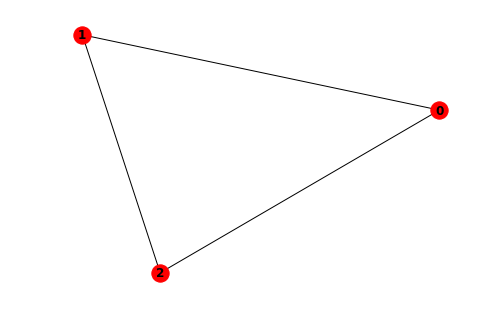

In [55]:
G.add_edge(1, 2)
H = nx.DiGraph(G)   # create a DiGraph using the connections from G
list(H.edges())
edgelist = [(0, 1), (1, 2), (2, 0)]
H = nx.Graph(edgelist)
nx.draw(H, with_labels=True, font_weight='bold')

# Accessing edges and neighbors

In addition to the views `Graph.edges`, and `Graph.adj`,
access to edges and neighbors is possible using subscript notation.

{2: {'color': 'yellow'}}
{1: {'color': 'yellow'}}
{'color': 'yellow'}


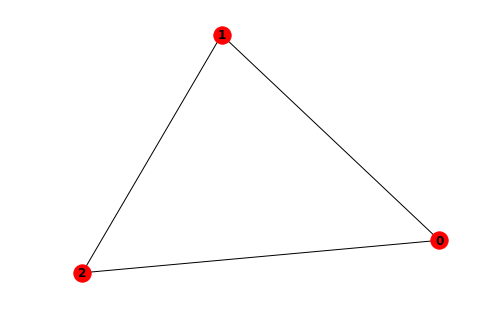

In [56]:
G = nx.Graph([(1, 2, {"color": "yellow"})])
G[1]  # same as G.adj[1]
print(G[1])
print(G[2])
G[1][2]
print(G[1][2])
G.edges[1, 2]

nx.draw(H, with_labels=True, font_weight='bold')

You can get/set the attributes of an edge using subscript notation
if the edge already exists.

{'color': 'red'}
{'color': 'blue'}


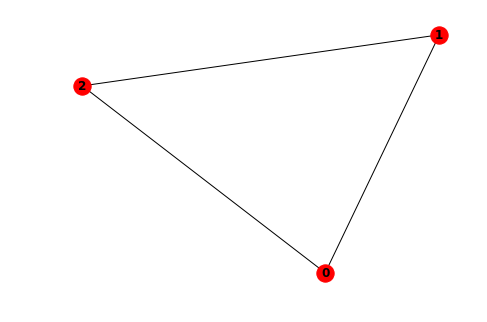

In [58]:
G.add_edge(1, 3)
G[1][3]['color'] = "blue"
G.edges[1, 2]['color'] = "red"
G.edges[1, 2]
print(G[1][2])
print(G[1][3])

nx.draw(H, with_labels=True, font_weight='bold')

Fast examination of all (node, adjacency) pairs is achieved using
`G.adjacency()`, or `G.adj.items()`.
Note that for undirected graphs, adjacency iteration sees each edge twice.

In [49]:
FG = nx.Graph()
FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])
for n, nbrs in FG.adj.items():
   print(nbrs)
   print(n)
   for nbr, eattr in nbrs.items():
       wt = eattr['weight']
       if wt < 0.5: 
          print(f"({n}, {nbr}, {wt:.3})")

{2: {'weight': 0.125}, 3: {'weight': 0.75}}
1
(1, 2, 0.125)
{1: {'weight': 0.125}, 4: {'weight': 1.2}}
2
(2, 1, 0.125)
{1: {'weight': 0.75}, 4: {'weight': 0.375}}
3
(3, 4, 0.375)
{2: {'weight': 1.2}, 3: {'weight': 0.375}}
4
(4, 3, 0.375)


Convenient access to all edges is achieved with the edges property.

In [20]:
for (u, v, wt) in FG.edges.data('weight'):
    if wt < 0.5:
        print(f"({u}, {v}, {wt:.3})")

(1, 2, 0.125)
(3, 4, 0.375)


# Adding attributes to graphs, nodes, and edges

Attributes such as weights, labels, colors, or whatever Python object you like,
can be attached to graphs, nodes, or edges.

Each graph, node, and edge can hold key/value attribute pairs in an associated
attribute dictionary (the keys must be hashable).  By default these are empty,
but attributes can be added or changed using `add_edge`, `add_node` or direct
manipulation of the attribute dictionaries named `G.graph`, `G.nodes`, and
`G.edges` for a graph `G`.

## Graph attributes

Assign graph attributes when creating a new graph

In [62]:
G = nx.Graph(day="Friday")
G.graph

{'day': 'Friday'}

Or you can modify attributes later

In [63]:
G.graph['day'] = "Monday"
G.graph
print(G.edges.data())

[]


# Node attributes

Add node attributes using `add_node()`, `add_nodes_from()`, or `G.nodes`

In [64]:
G.add_node(1, time='5pm')
G.add_nodes_from([3], time='2pm')
G.nodes[1]
G.nodes[1]['room'] = 714
G.nodes.data()

NodeDataView({1: {'time': '5pm', 'room': 714}, 3: {'time': '2pm'}})

Note that adding a node to `G.nodes` does not add it to the graph, use
`G.add_node()` to add new nodes. Similarly for edges.

# Edge Attributes

Add/change edge attributes using `add_edge()`, `add_edges_from()`,
or subscript notation.

In [65]:
G.add_edge(1, 2, weight=4.7 )
G.add_edges_from([(3, 4), (4, 5)], color='red')
G.add_edges_from([(1, 2, {'color': 'blue'}), (2, 3, {'weight': 8})])
G[1][2]['weight'] = 4.7
G.edges[3, 4]['weight'] = 4.2
print(G.edges.data())

[(1, 2, {'weight': 4.7, 'color': 'blue'}), (3, 4, {'color': 'red', 'weight': 4.2}), (3, 2, {'weight': 8}), (4, 5, {'color': 'red'})]


The special attribute `weight` should be numeric as it is used by
algorithms requiring weighted edges.

 Directed graphs

The `DiGraph` class provides additional methods and properties specific
to directed edges, e.g.,
`DiGraph.out_edges`, `DiGraph.in_degree`,
`DiGraph.predecessors()`, `DiGraph.successors()` etc.
To allow algorithms to work with both classes easily, the directed versions of
`neighbors()` is equivalent to `successors()` while `degree` reports
the sum of `in_degree` and `out_degree` even though that may feel
inconsistent at times.

In [62]:
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75)])
print(DG.edges.data())
DG.out_degree(1, weight='weight')
print(DG.out_degree(1, weight='weight'))
DG.degree(1, weight='weight') 
list(DG.successors(1))
list(DG.neighbors(1))

[(1, 2, {'weight': 0.5}), (3, 1, {'weight': 0.75})]
0.5


[2]

Some algorithms work only for directed graphs and others are not well
defined for directed graphs.  Indeed the tendency to lump directed
and undirected graphs together is dangerous.  If you want to treat
a directed graph as undirected for some measurement you should probably
convert it using `Graph.to_undirected()` or with

In [26]:
H = nx.Graph(G)  # create an undirected graph H from a directed graph G

# Graph generators and graph operations

In addition to constructing graphs node-by-node or edge-by-edge, they
can also be generated by

1. Applying classic graph operations, such as:

1. Using a call to one of the classic small graphs, e.g.,

1. Using a (constructive) generator for a classic graph, e.g.,

like so:

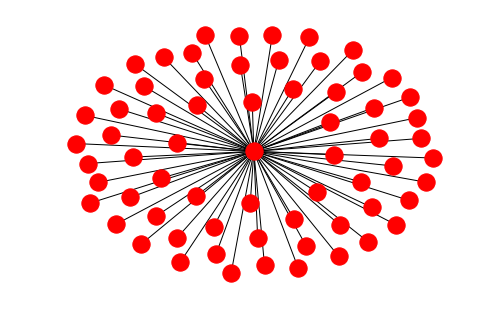

In [80]:
K_5 = nx.complete_graph(15)
# nx.draw(K_5)
K_3_5 = nx.complete_bipartite_graph(3, 5)
# nx.draw(K_3_5)
barbell = nx.barbell_graph(4, 3)
# nx.draw(barbell)
lollipop = nx.lollipop_graph(10, 5)
# nx.draw(lollipop)
st= nx.star_graph(65)
nx.draw(st)

1. Using a stochastic graph generator, e.g,

like so:

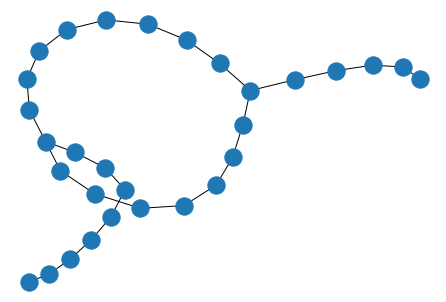

In [69]:
er = nx.erdos_renyi_graph(100, 0.15)
# nx.draw(er)
ws = nx.watts_strogatz_graph(30, 3, 0.1)
nx.draw(ws)
ba = nx.barabasi_albert_graph(100, 5)
# nx.draw(ba)
red = nx.random_lobster(100, 0.9, 0.9)
# nx.draw(red)


1. Reading a graph stored in a file using common graph formats,
   such as edge lists, adjacency lists, GML, GraphML, pickle, LEDA and others.

In [70]:
nx.write_gml(red, "path.to.file")
mygraph = nx.read_gml("path.to.file")

For details on graph formats see Reading and writing graphs
and for graph generator functions see Graph generators

# Analyzing graphs

The structure of `G` can be analyzed using various graph-theoretic
functions such as:

In [80]:
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3)])
G.add_node("spam")       # adds node "spam"
c=list(nx.connected_components(G))
print(c)
s=sorted(d for n, d in G.degree())
print(s)
nx.clustering(G)

[{1, 2, 3}, {'spam'}]
[0, 1, 1, 2]


{1: 0, 2: 0, 3: 0, 'spam': 0}

Some functions with large output iterate over (node, value) 2-tuples.
These are easily stored in a [dict](https://docs.python.org/3/library/stdtypes.html#dict) structure if you desire.

In [81]:
sp = dict(nx.all_pairs_shortest_path(G))
sp[3]
sp

{1: {1: [1], 2: [1, 2], 3: [1, 3]},
 2: {2: [2], 1: [2, 1], 3: [2, 1, 3]},
 3: {3: [3], 1: [3, 1], 2: [3, 1, 2]},
 'spam': {'spam': ['spam']}}

See Algorithms for details on graph algorithms
supported.

# Drawing graphs

NetworkX is not primarily a graph drawing package but basic drawing with
Matplotlib as well as an interface to use the open source Graphviz software
package are included.  These are part of the `networkx.drawing` module and will
be imported if possible.

First import Matplotlib’s plot interface (pylab works too)

In [82]:
import matplotlib.pyplot as plt

To test if the import of `networkx.drawing` was successful draw `G` using one of

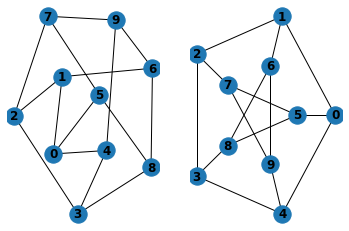

In [83]:
G = nx.petersen_graph()
subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
subax2 = plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

when drawing to an interactive display.  Note that you may need to issue a
Matplotlib

In [84]:
plt.show()

command if you are not using matplotlib in interactive mode (see
[this Matplotlib FAQ](https://matplotlib.org/stable/faq/installing_faq.html)).

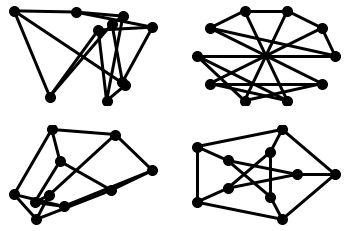

In [89]:
options = {
    'node_color': 'black',
    'node_size': 100,
    'width': 3,
}
subax1 = plt.subplot(221)
nx.draw_random(G, **options)
subax2 = plt.subplot(222)
nx.draw_circular(G, **options)
subax3 = plt.subplot(223)
nx.draw_spectral(G, **options)
subax4 = plt.subplot(224)
# pos = nx.shell_layout(G)
nx.draw_shell(G, nlist=[range(5,10), range(5)], **options)

You can find additional options via `draw_networkx()` and
layouts via `layout`.
You can use multiple shells with `draw_shell()`.

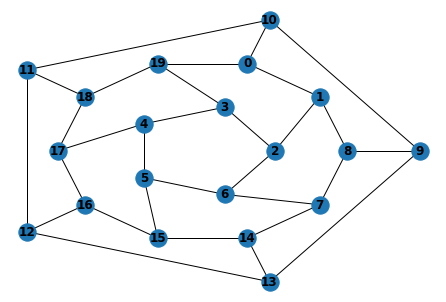

In [92]:
G = nx.dodecahedral_graph()
shells = [[2, 3, 4, 5, 6], [8, 1, 0, 19, 18, 17, 16, 15, 14, 7], [9, 10, 11, 12, 13]]
# nx.draw_shell(G, nlist=shells, **options)
nx.draw_shell(G, nlist=shells, with_labels=True, font_weight='bold')

To save drawings to a file, use, for example

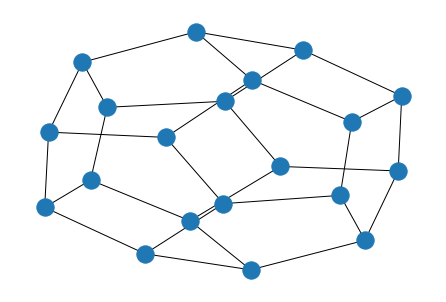

In [38]:
nx.draw(G)
plt.savefig("path.png")

writes to the file `path.png` in the local directory. If Graphviz and
PyGraphviz or pydot, are available on your system, you can also use
`nx_agraph.graphviz_layout(G)` or `nx_pydot.graphviz_layout(G)` to get the
node positions, or write the graph in dot format for further processing.

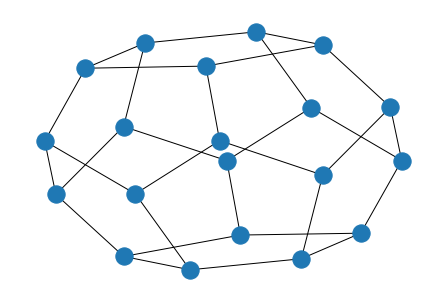

In [39]:
from networkx.drawing.nx_pydot import write_dot
pos = nx.nx_agraph.graphviz_layout(G)
nx.draw(G, pos=pos)
write_dot(G, 'file.dot')

See Drawing for additional details.